In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit, describe
import numpy as np

In [3]:
hist_sig = np.asarray([1,2,3,4])
hist_bkg = np.asarray([5,5,5,5])

In [4]:
m = HistiModel('model')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)

In [5]:
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [6]:
print describe(background.pdf)

['x', 'BackgroundNorm']


In [7]:
print background.bincontent
assess = []
for i in range(len(background.binedges)):
    assess.append(background.pdf(i,1))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0, 0.0]


In [8]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

In [9]:
data = hist_sig*2 +hist_bkg

chan.SetData(data)
m.AddChannel(chan)

In [10]:
blh = BinnedLH(m, bound=(0,4))

In [11]:
params = m.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'limit_BackgroundNorm': (0, 100), 'errordef': 1}


In [12]:
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


In [13]:
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

FCN = 7.26387865589 
 TOTAL NCALL = 43 
 NCALLS = 43 
 
 
 EDM = 2.93583670878e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39966,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.979534,0,0,0.0,100.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39931,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.978879,0,0,0.0,100.0,


+,SigXSecOverSM,BackgroundNorm
SigXSecOverSM,1.00,-0.90
BackgroundNorm,-0.90,1.00


Error,-1.98618852268,1.00009089428
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


Error,-0.756705600149,1.08484147103
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0848414710272252, 'lower': -0.756705600148597, 'at_lower_limit': False, 'min': 1.000028393191904, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 82},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 1.0000908942838587, 'lower': -1.9861885226766014, 'at_lower_limit': False, 'min': 1.9999091057161413, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 52}}

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/iminuit/_plotting.py:51: RuntimeWarning: band and text is requested but the bound is too narrow.
  warnings.warn(RuntimeWarning('band and text is requested but'


(array([-2.79871089, -2.70176907, -2.60482725, -2.50788544, -2.41094362,
        -2.3140018 , -2.21705998, -2.12011816, -2.02317635, -1.92623453,
        -1.82929271, -1.73235089, -1.63540907, -1.53846726, -1.44152544,
        -1.34458362, -1.2476418 , -1.15069998, -1.05375816, -0.95681635,
        -0.85987453, -0.76293271, -0.66599089, -0.56904907, -0.47210726,
        -0.37516544, -0.27822362, -0.1812818 , -0.08433998,  0.01260183,
         0.10954365,  0.20648547,  0.30342729,  0.40036911,  0.49731092,
         0.59425274,  0.69119456,  0.78813638,  0.8850782 ,  0.98202002,
         1.07896183,  1.17590365,  1.27284547,  1.36978729,  1.46672911,
         1.56367092,  1.66061274,  1.75755456,  1.85449638,  1.9514382 ,
         2.04838001,  2.14532183,  2.24226365,  2.33920547,  2.43614729,
         2.53308911,  2.63003092,  2.72697274,  2.82391456,  2.92085638,
         3.0177982 ,  3.11474001,  3.21168183,  3.30862365,  3.40556547,
         3.50250729,  3.5994491 ,  3.69639092,  3.7

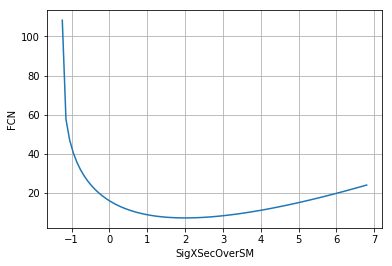

In [14]:
%matplotlib inline
minimiser.draw_profile('SigXSecOverSM')

## Testing PDF

In [15]:
m2 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [16]:
background.AddOverallSys("NormSystUncertainty",.9,1.1)

In [17]:
from iminuit import describe
describe(background.pdf)

['x', 'BackgroundNorm', 'NormSystUncertainty']

In [18]:
print background.bincontent
assess = []
for i in range(len(background.bincontent)):
    assess.append(background.pdf(i,1,0))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0]


In [19]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m2.AddChannel(chan)

In [20]:
blh = BinnedLH(m2, bound=(0,4))
params = m2.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'NormSystUncertainty': 0.20000000000000007, 'SigXSecOverSM': 1.0, 'errordef': 1, 'limit_NormSystUncertainty': (-5, 5), 'limit_BackgroundNorm': (0, 100)}


In [21]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter NormSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 7.26406363993 
 TOTAL NCALL = 53 
 NCALLS = 53 
 
 
 EDM = 0.000181873540138 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.02418,2.40448,0,0,0.0,3.0,
2,BackgroundNorm,0.982564,8.05421,0,0,0.0,100.0,
3,NormSystUncertainty,0.0434646,5.6755,0,0,-5.0,5.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.02418,2.39918,0,0,0.0,3.0,
2,BackgroundNorm,0.982564,8.03229,0,0,0.0,100.0,
3,NormSystUncertainty,0.0434646,5.64855,0,0,-5.0,5.0,


+,SigXSecOverSM,BackgroundNorm,NormSystUncertainty
SigXSecOverSM,1.00,-0.04,-0.11
BackgroundNorm,-0.04,1.00,-0.99
NormSystUncertainty,-0.11,-0.99,1.00


Error,-2.0102899895,0.975819632121
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = +2.130923
         BackgroundNorm = -7.071648
    NormSystUncertainty = -2.129178

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:462: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = nan
         BackgroundNorm = -7.071648
    NormSystUncertainty = -2.129178

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = +2.130923
         BackgroundNorm = -7.071648
    NormSystUncertainty 

Error,-8.05421246586,2.54836239918
Valid,False,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-5.04346459467,4.95653540533
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 2.548362399175536, 'lower': -8.054212465860097, 'at_lower_limit': False, 'min': 0.9825642187442141, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': False, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 617},
 'NormSystUncertainty': {'lower_new_min': False, 'upper': 4.956535405325898, 'lower': -5.043464594674102, 'at_lower_limit': True, 'min': 0.04346459467410213, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 181},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 0.9758196321211008, 'lower': -2.010289989503734, 'at_lower_limit': False, 'min': 2.024180367878899, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 119}}

(array([-2.77418587, -2.67724917, -2.58031248, -2.48337579, -2.3864391 ,
        -2.28950241, -2.19256572, -2.09562902, -1.99869233, -1.90175564,
        -1.80481895, -1.70788226, -1.61094557, -1.51400888, -1.41707218,
        -1.32013549, -1.2231988 , -1.12626211, -1.02932542, -0.93238873,
        -0.83545203, -0.73851534, -0.64157865, -0.54464196, -0.44770527,
        -0.35076858, -0.25383188, -0.15689519, -0.0599585 ,  0.03697819,
         0.13391488,  0.23085157,  0.32778827,  0.42472496,  0.52166165,
         0.61859834,  0.71553503,  0.81247172,  0.90940841,  1.00634511,
         1.1032818 ,  1.20021849,  1.29715518,  1.39409187,  1.49102856,
         1.58796526,  1.68490195,  1.78183864,  1.87877533,  1.97571202,
         2.07264871,  2.16958541,  2.2665221 ,  2.36345879,  2.46039548,
         2.55733217,  2.65426886,  2.75120555,  2.84814225,  2.94507894,
         3.04201563,  3.13895232,  3.23588901,  3.3328257 ,  3.4297624 ,
         3.52669909,  3.62363578,  3.72057247,  3.8

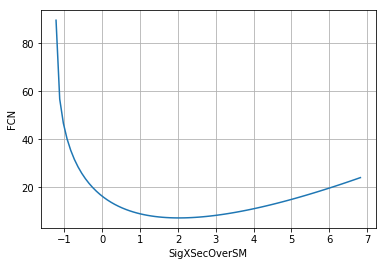

In [22]:
minimiser.draw_profile('SigXSecOverSM')

# Testing HistoSys

In [23]:
m3 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)
background.AddOverallSys("NormSystUncertainty",.9,1.1)

In [24]:
h_up = [5.1,5.2,5.3,5.6]
h_down = [4.9,4.8,4.7,4.4]
background.AddHistoSys("HistoSystUncertainty",h_down,h_up)

In [25]:
from iminuit import describe
describe(background.pdf)

['x', 'BackgroundNorm', 'NormSystUncertainty', 'HistoSystUncertainty']

In [26]:
print background.bincontent
assess = []
for i in range(len(background.bincontent)):
    assess.append(background.pdf(i,1.,0.,0.))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0]


In [27]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m3.AddChannel(chan)

In [28]:
blh = BinnedLH(m3, bound=(0,4))
params = m3.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'NormSystUncertainty': 0.20000000000000007, 'SigXSecOverSM': 1.0, 'limit_HistoSystUncertainty': (-5, 5), 'HistoSystUncertainty': 2.4000000000000057, 'errordef': 1, 'limit_NormSystUncertainty': (-5, 5), 'limit_BackgroundNorm': (0, 100)}


In [29]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter NormSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter HistoSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 7.26397149772 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 7.2545180027e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.95743,1.61873,0,0,0.0,3.0,
2,BackgroundNorm,0.994146,5.95512,0,0,0.0,100.0,
3,NormSystUncertainty,0.118706,6.98125,0,0,-5.0,5.0,
4,HistoSystUncertainty,0.319954,5.91294,0,0,-5.0,5.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.95743,1.75997,0,0,0.0,3.0,
2,BackgroundNorm,0.994146,5.89329,0,0,0.0,100.0,
3,NormSystUncertainty,0.118706,7.0251,0,0,-5.0,5.0,
4,HistoSystUncertainty,0.319954,5.16801,0,0,-5.0,5.0,


+,SigXSecOverSM,BackgroundNorm,NormSystUncertainty,HistoSystUncertainty
SigXSecOverSM,1.00,0.01,-0.14,-0.92
BackgroundNorm,0.01,1.00,-0.98,-0.05
NormSystUncertainty,-0.14,-0.98,1.00,0.12
HistoSystUncertainty,-0.92,-0.05,0.12,1.00


Error,-1.95742501576,1.04257498424
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           SigXSecOverSM = +2.337147
          BackgroundNorm = -4.960974
     NormSystUncertainty = -3.498937
    HistoSystUncertainty = -1.146205

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           SigXSecOverSM = nan
          BackgroundNorm = -4.960974
     NormSystUncertainty = -3.498937
    HistoSystUncertainty = -1.146205

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           SigXSecOverSM = +2.337147
          BackgroundNorm = -4.960974
     NormSystUncertainty = nan
    HistoSystUncertainty = -1.146205

  after removing the cwd from sys.path

Error,-5.95512057385,2.58183829813
Valid,False,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-5.1187061485,4.8812938515
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


Error,-5.31995392007,4.68004607993
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 2.5818382981271, 'lower': -5.955120573847924, 'at_lower_limit': False, 'min': 0.9941464984404236, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': False, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 888},
 'HistoSystUncertainty': {'lower_new_min': False, 'upper': 4.680046079933185, 'lower': -5.319953920066815, 'at_lower_limit': True, 'min': 0.31995392006681467, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 147},
 'NormSystUncertainty': {'lower_new_min': False, 'upper': 4.881293851500734, 'lower': -5.118706148499266, 'at_lower_limit': True, 'min': 0.11870614849926575, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 285},
 

(array([ -1.00160674e+01,  -9.80725886e+00,  -9.59845034e+00,
         -9.38964183e+00,  -9.18083332e+00,  -8.97202481e+00,
         -8.76321630e+00,  -8.55440779e+00,  -8.34559928e+00,
         -8.13679077e+00,  -7.92798226e+00,  -7.71917375e+00,
         -7.51036524e+00,  -7.30155673e+00,  -7.09274821e+00,
         -6.88393970e+00,  -6.67513119e+00,  -6.46632268e+00,
         -6.25751417e+00,  -6.04870566e+00,  -5.83989715e+00,
         -5.63108864e+00,  -5.42228013e+00,  -5.21347162e+00,
         -5.00466311e+00,  -4.79585460e+00,  -4.58704608e+00,
         -4.37823757e+00,  -4.16942906e+00,  -3.96062055e+00,
         -3.75181204e+00,  -3.54300353e+00,  -3.33419502e+00,
         -3.12538651e+00,  -2.91657800e+00,  -2.70776949e+00,
         -2.49896098e+00,  -2.29015247e+00,  -2.08134395e+00,
         -1.87253544e+00,  -1.66372693e+00,  -1.45491842e+00,
         -1.24610991e+00,  -1.03730140e+00,  -8.28492890e-01,
         -6.19684379e-01,  -4.10875868e-01,  -2.02067357e-01,
        

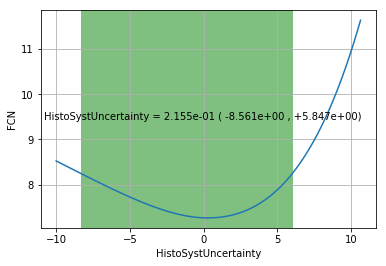

In [30]:
minimiser.draw_profile('HistoSystUncertainty')

(array([-13.93149195, -13.64764957, -13.36380718, -13.0799648 ,
        -12.79612241, -12.51228002, -12.22843764, -11.94459525,
        -11.66075287, -11.37691048, -11.09306809, -10.80922571,
        -10.52538332, -10.24154094,  -9.95769855,  -9.67385616,
         -9.39001378,  -9.10617139,  -8.82232901,  -8.53848662,
         -8.25464424,  -7.97080185,  -7.68695946,  -7.40311708,
         -7.11927469,  -6.83543231,  -6.55158992,  -6.26774753,
         -5.98390515,  -5.70006276,  -5.41622038,  -5.13237799,
         -4.8485356 ,  -4.56469322,  -4.28085083,  -3.99700845,
         -3.71316606,  -3.42932368,  -3.14548129,  -2.8616389 ,
         -2.57779652,  -2.29395413,  -2.01011175,  -1.72626936,
         -1.44242697,  -1.15858459,  -0.8747422 ,  -0.59089982,
         -0.30705743,  -0.02321504,   0.26062734,   0.54446973,
          0.82831211,   1.1121545 ,   1.39599688,   1.67983927,
          1.96368166,   2.24752404,   2.53136643,   2.81520881,
          3.0990512 ,   3.38289359,   3.

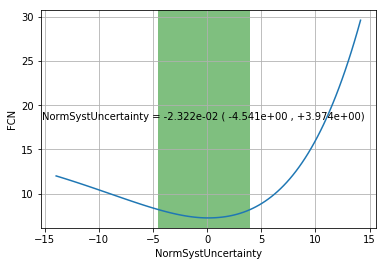

In [31]:
minimiser.draw_profile('NormSystUncertainty')

(array([-10.79243868, -10.55432585, -10.31621302, -10.07810019,
         -9.83998736,  -9.60187452,  -9.36376169,  -9.12564886,
         -8.88753603,  -8.6494232 ,  -8.41131036,  -8.17319753,
         -7.9350847 ,  -7.69697187,  -7.45885904,  -7.2207462 ,
         -6.98263337,  -6.74452054,  -6.50640771,  -6.26829488,
         -6.03018204,  -5.79206921,  -5.55395638,  -5.31584355,
         -5.07773072,  -4.83961788,  -4.60150505,  -4.36339222,
         -4.12527939,  -3.88716656,  -3.64905372,  -3.41094089,
         -3.17282806,  -2.93471523,  -2.6966024 ,  -2.45848957,
         -2.22037673,  -1.9822639 ,  -1.74415107,  -1.50603824,
         -1.26792541,  -1.02981257,  -0.79169974,  -0.55358691,
         -0.31547408,  -0.07736125,   0.16075159,   0.39886442,
          0.63697725,   0.87509008,   1.11320291,   1.35131575,
          1.58942858,   1.82754141,   2.06565424,   2.30376707,
          2.54187991,   2.77999274,   3.01810557,   3.2562184 ,
          3.49433123,   3.73244407,   3.

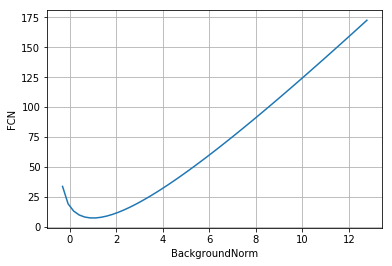

In [32]:
minimiser.draw_profile('BackgroundNorm')

(array([ -1.56251702e+00,  -1.49140708e+00,  -1.42029714e+00,
         -1.34918720e+00,  -1.27807726e+00,  -1.20696732e+00,
         -1.13585738e+00,  -1.06474744e+00,  -9.93637498e-01,
         -9.22527558e-01,  -8.51417618e-01,  -7.80307678e-01,
         -7.09197738e-01,  -6.38087798e-01,  -5.66977858e-01,
         -4.95867917e-01,  -4.24757977e-01,  -3.53648037e-01,
         -2.82538097e-01,  -2.11428157e-01,  -1.40318217e-01,
         -6.92082769e-02,   1.90166320e-03,   7.30116033e-02,
          1.44121543e-01,   2.15231483e-01,   2.86341424e-01,
          3.57451364e-01,   4.28561304e-01,   4.99671244e-01,
          5.70781184e-01,   6.41891124e-01,   7.13001064e-01,
          7.84111004e-01,   8.55220944e-01,   9.26330884e-01,
          9.97440825e-01,   1.06855076e+00,   1.13966070e+00,
          1.21077064e+00,   1.28188058e+00,   1.35299052e+00,
          1.42410047e+00,   1.49521041e+00,   1.56632035e+00,
          1.63743029e+00,   1.70854023e+00,   1.77965017e+00,
        

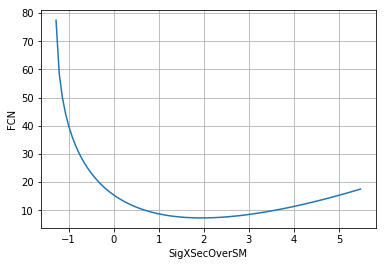

In [33]:
minimiser.draw_profile('SigXSecOverSM')

## large histograms

In [34]:
hist_sig = np.linspace(1,100, 100)
hist_bkg = np.ones(100)*100

In [35]:
print np.flip(hist_sig,0)

[ 100.   99.   98.   97.   96.   95.   94.   93.   92.   91.   90.   89.
   88.   87.   86.   85.   84.   83.   82.   81.   80.   79.   78.   77.
   76.   75.   74.   73.   72.   71.   70.   69.   68.   67.   66.   65.
   64.   63.   62.   61.   60.   59.   58.   57.   56.   55.   54.   53.
   52.   51.   50.   49.   48.   47.   46.   45.   44.   43.   42.   41.
   40.   39.   38.   37.   36.   35.   34.   33.   32.   31.   30.   29.
   28.   27.   26.   25.   24.   23.   22.   21.   20.   19.   18.   17.
   16.   15.   14.   13.   12.   11.   10.    9.    8.    7.    6.    5.
    4.    3.    2.    1.]


In [36]:
m4 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = np.linspace(0,100, 101)
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
#background.AddNorm("BackgroundNorm",1.,0,100)
#background.AddOverallSys("NormSystUncertainty",.9,1.1)
h_up = hist_bkg + np.flip(hist_sig, 0)*.5
h_down = hist_bkg - np.flip(hist_sig, 0)*.5
background.AddHistoSys("HistoSystUncertainty",h_down,h_up)
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m4.AddChannel(chan)

blh = BinnedLH(m4, bound=(0,101))
params = m4.Parameters()

In [37]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter HistoSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 353.867880706 
 TOTAL NCALL = 75 
 NCALLS = 75 
 
 
 EDM = 7.63912714484e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2,0.0414701,0,0,0.0,3.0,
2,HistoSystUncertainty,9.5779e-07,0.0584161,0,0,-5.0,5.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2,0.0414703,0,0,0.0,3.0,
2,HistoSystUncertainty,9.5779e-07,0.0584192,0,0,-5.0,5.0,


+,SigXSecOverSM,HistoSystUncertainty
SigXSecOverSM,1.00,-0.40
HistoSystUncertainty,-0.40,1.00


Error,-0.0442757271289,0.042804136405
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0511789481526,0.0799277503591
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'HistoSystUncertainty': {'lower_new_min': False, 'upper': 0.07992775035908727, 'lower': -0.05117894815261005, 'at_lower_limit': False, 'min': 9.577896928902874e-07, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 24},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 0.042804136405014605, 'lower': -0.04427572712885599, 'at_lower_limit': False, 'min': 2.0000000998353973, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 26}}

(array([ 1.91705946,  1.91873503,  1.9204106 ,  1.92208617,  1.92376173,
         1.9254373 ,  1.92711287,  1.92878844,  1.93046401,  1.93213958,
         1.93381515,  1.93549071,  1.93716628,  1.93884185,  1.94051742,
         1.94219299,  1.94386856,  1.94554412,  1.94721969,  1.94889526,
         1.95057083,  1.9522464 ,  1.95392197,  1.95559754,  1.9572731 ,
         1.95894867,  1.96062424,  1.96229981,  1.96397538,  1.96565095,
         1.96732651,  1.96900208,  1.97067765,  1.97235322,  1.97402879,
         1.97570436,  1.97737993,  1.97905549,  1.98073106,  1.98240663,
         1.9840822 ,  1.98575777,  1.98743334,  1.9891089 ,  1.99078447,
         1.99246004,  1.99413561,  1.99581118,  1.99748675,  1.99916232,
         2.00083788,  2.00251345,  2.00418902,  2.00586459,  2.00754016,
         2.00921573,  2.01089129,  2.01256686,  2.01424243,  2.015918  ,
         2.01759357,  2.01926914,  2.02094471,  2.02262027,  2.02429584,
         2.02597141,  2.02764698,  2.02932255,  2.0

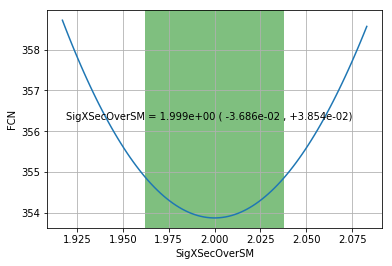

In [38]:
minimiser.draw_profile('SigXSecOverSM')

Help on built-in function draw_mncontour:

draw_mncontour(...)
    Minuit.draw_mncontour(self, x, y, bins=100, nsigma=2, numpoints=20, sigma_res=4)
    Draw minos contour.
    
            **Arguments:**
    
                - **x**, **y** parameter name
    
                - **bins** number of bin in contour grid.
    
                - **nsigma** number of sigma contour to draw
    
                - **numpoints** number of points to calculate for each contour
    
                - **sigma_res** number of sigma level to calculate MnContours.
                  Default 4.
    
            **Returns:**
    
                x, y, gridvalue, contour
    
                gridvalue is interorlated nsigma



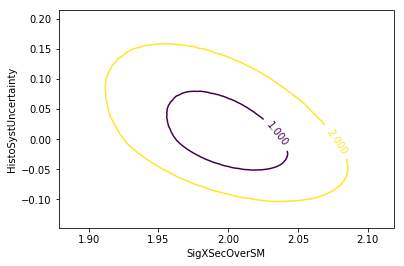

In [39]:
minimiser.draw_mncontour('SigXSecOverSM',"HistoSystUncertainty", numpoints=60, bins=200)
help(minimiser.draw_mncontour)

# Testing Combined Pdf

In [40]:
from histimator.pdfs import HistiCombPdf

In [41]:
new_background = HistiSample('background')
new_background.SetHisto((np.asarray([50,75]), np.asarray([100,120,150])))
new_background.AddNorm("BackgroundNorm",1.,0,100)

In [42]:
new_chan = HistiChannel("CR")
new_chan.AddSample(new_background)
new_chan.SetData([53,72])

In [43]:
new_chan.pdf.binedges

array([100, 120, 150])

In [44]:
m5 = HistiModel("final model")
m5.AddChannel(chan)
m5.AddChannel(new_chan)
print m5.data

[  102.   104.   106.   108.   110.   112.   114.   116.   118.   120.
   122.   124.   126.   128.   130.   132.   134.   136.   138.   140.
   142.   144.   146.   148.   150.   152.   154.   156.   158.   160.
   162.   164.   166.   168.   170.   172.   174.   176.   178.   180.
   182.   184.   186.   188.   190.   192.   194.   196.   198.   200.
   202.   204.   206.   208.   210.   212.   214.   216.   218.   220.
   222.   224.   226.   228.   230.   232.   234.   236.   238.   240.
   242.   244.   246.   248.   250.   252.   254.   256.   258.   260.
   262.   264.   266.   268.   270.   272.   274.   276.   278.   280.
   282.   284.   286.   288.   290.   292.   294.   296.   298.   300.
  1060.  2160.]


In [45]:
blh = BinnedLH(m5)
params = m5.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'limit_HistoSystUncertainty': (-5, 5), 'limit_BackgroundNorm': (0, 100), 'errordef': 1, 'HistoSystUncertainty': 5050.0}


In [46]:
describe(blh)

['SigXSecOverSM', 'HistoSystUncertainty', 'BackgroundNorm']

In [47]:
blh = BinnedLH(m5)
describe(blh)

['SigXSecOverSM', 'HistoSystUncertainty', 'BackgroundNorm']

In [48]:
print describe(m5.pdf)
m5.pdf.evaluatePdf(1,-1, 1)

['x', 'SigXSecOverSM', 'HistoSystUncertainty', 'BackgroundNorm']


array([  51. ,   52.5,   54. ,   55.5,   57. ,   58.5,   60. ,   61.5,
         63. ,   64.5,   66. ,   67.5,   69. ,   70.5,   72. ,   73.5,
         75. ,   76.5,   78. ,   79.5,   81. ,   82.5,   84. ,   85.5,
         87. ,   88.5,   90. ,   91.5,   93. ,   94.5,   96. ,   97.5,
         99. ,  100.5,  102. ,  103.5,  105. ,  106.5,  108. ,  109.5,
        111. ,  112.5,  114. ,  115.5,  117. ,  118.5,  120. ,  121.5,
        123. ,  124.5,  126. ,  127.5,  129. ,  130.5,  132. ,  133.5,
        135. ,  136.5,  138. ,  139.5,  141. ,  142.5,  144. ,  145.5,
        147. ,  148.5,  150. ,  151.5,  153. ,  154.5,  156. ,  157.5,
        159. ,  160.5,  162. ,  163.5,  165. ,  166.5,  168. ,  169.5,
        171. ,  172.5,  174. ,  175.5,  177. ,  178.5,  180. ,  181.5,
        183. ,  184.5,  186. ,  187.5,  189. ,  190.5,  192. ,  193.5,
        195. ,  196.5,  198. ,  199.5,   50. ,   75. ])